In [71]:
import sklearn.linear_model as lm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The true function f that describes x and y is given by

$$
f(x) = \frac{1}{2}x + \sqrt{max(x, 0)} - cos x + 2
$$

and the noise is modeled by Gaussian Distributions, i.e. $\epsilon \sim N(0, 1)$

$$
y = f(x) + \epsilon
$$


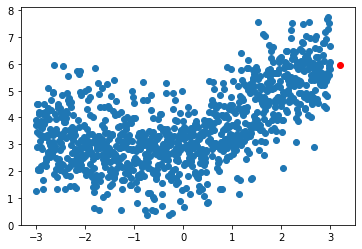

In [215]:
def f(x):
    return .5*x + np.sqrt(np.max(x, 0)) - np.cos(x) + 2 

#
N = 1000
x = np.linspace(-3, 3, N)
y = f(x) + np.random.randn(N)


fig, ax = plt.subplots()
ax.scatter(x, y)

# unseen data
x_test = 3.2
y_test = f(x_test) + np.random.randn()
ax.scatter(x_test, y_test, c='r')

plt.show()


The model that we will use to fit the data

$$
\hat f(x) = w_0 + w_1x + w_2x^2 + ... + w_dx^d
$$

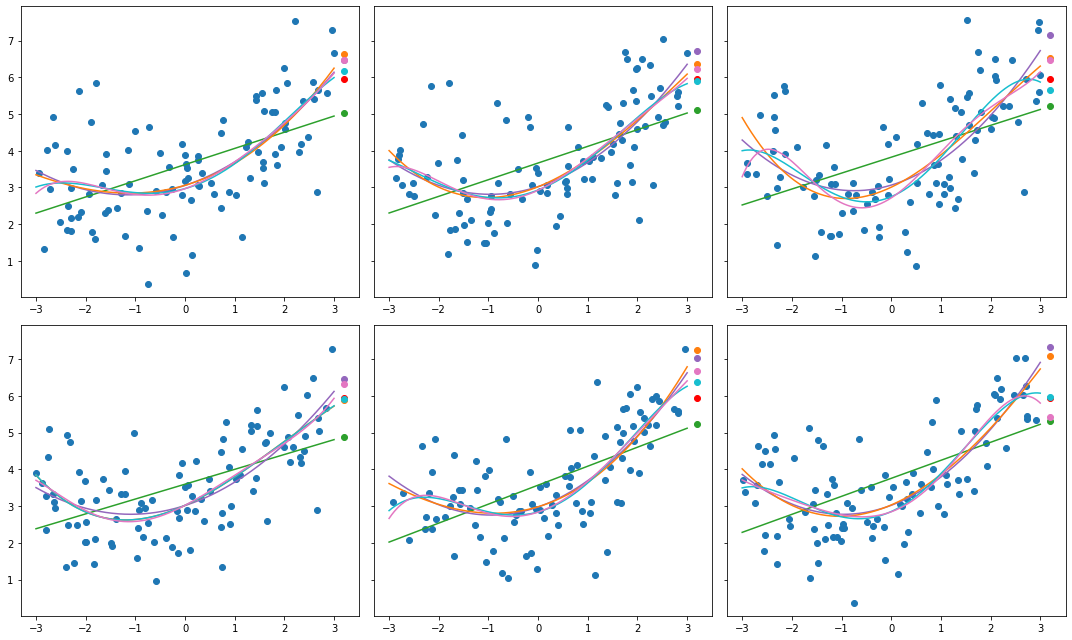

In [283]:
n = 100
iters = 6 # resample 6 times
dl = [1, 2, 3, 4, 5] # model complexity

x_range = np.linspace(-3, 3, N)
colors = np.array(['tab:green', 'tab:purple', 'tab:orange', 'tab:cyan', 'tab:pink'])

def f_hat(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)    


t1 = np.zeros((len(dl), iters))

fig, axs = plt.subplots(2, 3, sharey=True, figsize=(15, 9))
for i in range(2):
    for j in range(3):
        # resample data
        idx = np.random.permutation(N)[:n]
        x_train, y_train = x[idx], y[idx]

        # fit data
        w = []
        for d in dl:
            w.append(np.polyfit(x_train, y_train, d))


        axs[i, j].scatter(x_test, y_test, c='r')
        axs[i, j].scatter(x_train, y_train)
        for k in range(len(w)):
            axs[i, j].plot(x_range, f_hat(x_range, w[k]), c=colors[k])
            axs[i, j].scatter(x_test, f_hat(x_test, w[k]), c=colors[k])
            t1[k, (i * 3) + j] = f_hat(x_test, w[k])

plt.tight_layout()


In [284]:
"""
predicted value for diffrent model in each iteration
"""

t1


array([[5.03215675, 5.11770147, 5.21019205, 4.88911937, 5.22252887,
        5.32389621],
       [6.4667256 , 6.71985857, 7.14294633, 6.45635522, 7.03098125,
        7.33879663],
       [6.62373069, 6.34832628, 6.53060894, 5.89521909, 7.25758011,
        7.08859893],
       [6.17455224, 5.90836217, 5.66177355, 5.9094088 , 6.37261016,
        5.9824075 ],
       [6.45860144, 6.22677202, 6.47388996, 6.3274103 , 6.6899307 ,
        5.43144887]])

In [287]:
iters = 10000
dl = [1, 2, 3, 4, 5]

x_range = np.linspace(-3, 3, N)
x_test_hat = np.zeros((len(dl), iters))

for i in range(iters):
    # sample data
    idx = np.random.permutation(N)[:n]
    x_train, y_train = x[idx], y[idx]

    # fit data 
    w = []
    for d in dl:
        w.append(np.polyfit(x_train, y_train, d))

    # make prediction
    for k in range(len(w)):
        x_test_hat[k, i] = f_hat(x_test, w[k])

x_test_hat.shape


(5, 10000)

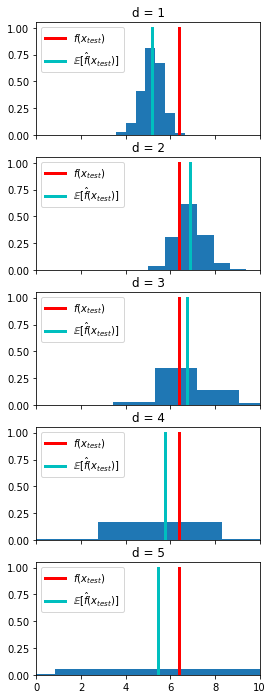

In [290]:
# distribution of unseen data across different training data

fig, ax = plt.subplots(len(dl), 1, sharex=True, sharey=True, figsize=(4, 12))

for i in range(len(dl)):
    ax[i].hist(x_test_hat[i], density=True)

    ax[i].plot([f(x_test), f(x_test)], [0, 1], 'r', linewidth=3.0, label=r'$f(x_{test})$')
    ax[i].plot([np.mean(x_test_hat[i]), np.mean(x_test_hat[i])], [0, 1], 'c', linewidth=3.0, label=r'$\mathbb{E}[\hat{f}(x_{test})]$')
    ax[i].legend()
    ax[i].set_title('d = {}'.format(dl[i]))
    ax[i].set_xlim(0, 10)


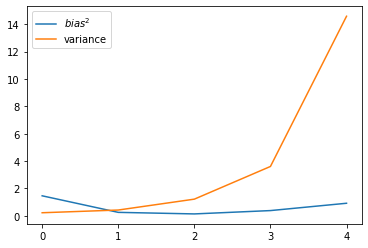

In [308]:
# bias variance tradeoff

bias_squared = (np.mean(x_test_hat, axis=1) - f(x_test))**2
variance = np.mean((x_test_hat - np.mean(x_test_hat, axis=1).reshape(-1, 1))**2, axis=1)

plt.plot(bias_squared, label=r'$bias^2$')
plt.plot(variance, label=r'variance')

plt.xticks(np.array(dl) - 1)
plt.legend()